In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import os

STEP 1

In [3]:
os.getcwd()

'/Users/dilagurer/Downloads/GSS_sas'

In [17]:
import pandas as pd

path = '/Users/dilagurer/Desktop/GSS_data.xlsx'
df = pd.read_excel(path)
print(df.head())


   year  id_  sibs  childs  sex
0  1972    1     3       0    2
1  1972    2     4       5    1
2  1972    3     5       4    2
3  1972    4     5       0    2
4  1972    5     2       2    2


from GSS dataset, I chose the variables children number, sex, and sibling numbers. 

In [19]:
missing = df.isnull().sum()
print(missing)

year      0
id_       0
sibs      0
childs    0
sex       0
dtype: int64


STEP 2

In [20]:
import pandas as pd
path = '/Users/dilagurer/Desktop/GSS_data.xlsx'

df = pd.read_excel(path)

#statistics for the 'childs' variable
print("Mean of child number:", df['childs'].mean())
print("Median of child number:", df['childs'].median())
print("SD of child number:", df['childs'].std())


# statistics for the 'sibs' variable
print("Mean of sibling number:", df['sibs'].mean())
print("Median of sibling number:", df['sibs'].median())
print("SD of sibling number:", df['sibs'].std())


Mean of child number: 1.5555463461804118
Median of child number: 2.0
SD of child number: 6.252999554446047
Mean of sibling number: 1.2869457107335267
Median of sibling number: 3.0
SD of sibling number: 16.365296296455476


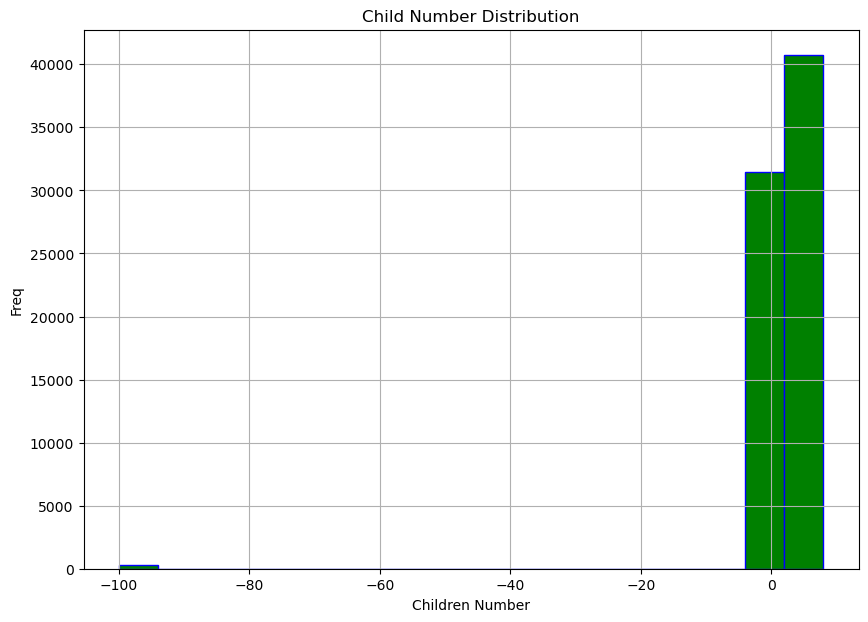

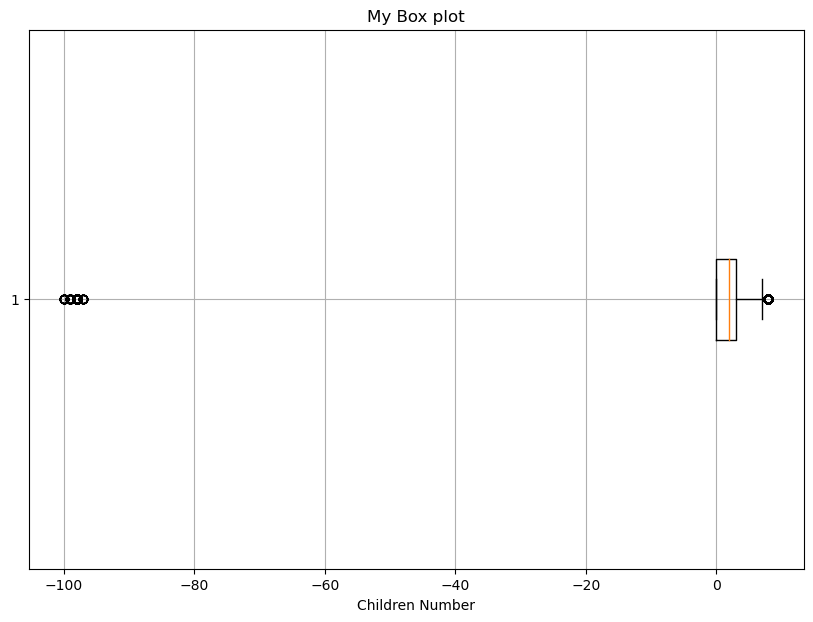

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/Users/dilagurer/Desktop/GSS_data.xlsx'

df = pd.read_excel(path)

#  histogram for the variable 'childs'
plt.figure(figsize=(10, 7))
plt.hist(df['childs'], bins=18, color='green', edgecolor='blue')
plt.title('Child Number Distribution')
plt.xlabel('Children Number')
plt.ylabel('Freq')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.boxplot(df['childs'], vert=False)
plt.title('My Box plot')
plt.xlabel('Children Number')
plt.grid(True)
plt.show()



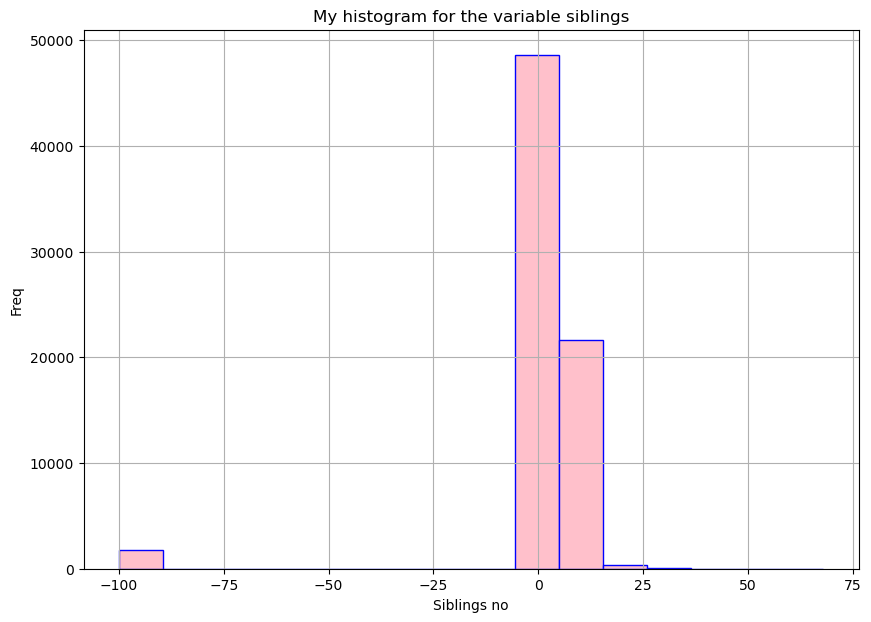

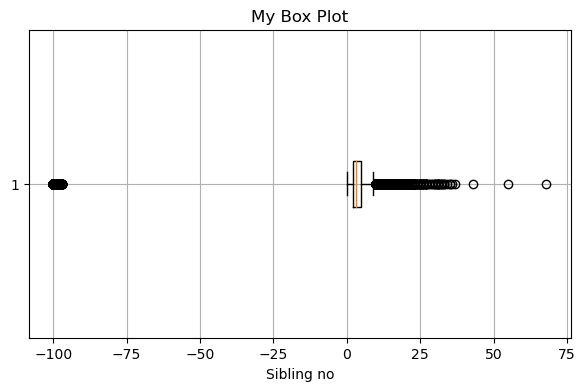

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
path = '/Users/dilagurer/Desktop/GSS_data.xlsx'

df = pd.read_excel(path)

# histogram for the variable 'sibs'
plt.figure(figsize=(10, 7))
plt.hist(df['sibs'], bins=16, color='pink', edgecolor='blue')
plt.title('My histogram for the variable siblings')
plt.xlabel('Siblings no')
plt.ylabel('Freq')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.boxplot(df['sibs'], vert=False)
plt.title('My Box Plot')
plt.xlabel('Sibling no')
plt.grid(True)
plt.show()


above, since sex which was another key variable wasn't used to create a histogram since it is a categorical variable. 

STEP 3 

below, for the t test, I will compare the mean differences of children number among females and males. However, since sex is a categorical variable and 1 was male and 2 was female in the dataset, I wrote a code according to that and named the numbers 1 & 2. 

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm

path = '/Users/dilagurer/Desktop/GSS_data.xlsx'

df = pd.read_excel(path)

male = df[df['sex'] == 1]['childs']
female = df[df['sex'] == 2]['childs']

t_stat, p_value = ttest_ind(male, female)
print("T-test result:", t_stat)
print("p:", p_value)

male_confidence_interval = sm.stats.DescrStatsW(male).tconfint_mean()
female_confidence_interval = sm.stats.DescrStatsW(female).tconfint_mean()

print("95% Confidence Interval for mean children number among males:", male_confidence_interval)
print("95% Confidence Interval for mean children number among feamles:", female_confidence_interval)

T-test result: -8.250239593454602
p: 1.607044610115846e-16
95% Confidence Interval for mean children number among males: (1.2890442919578518, 1.4325368444839657)
95% Confidence Interval for mean children number among feamles: (1.682628575875687, 1.795051878703604)


since p value is below 0.05, we can say that difference between child number among both sexes are statistically significant. 

STEP 4 

for correlation, I examined the relationship between the variables siblings number and child number, which are both numerical variables. 

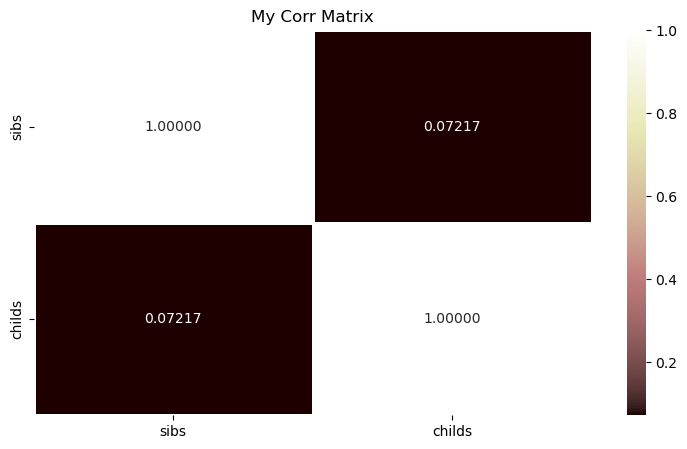

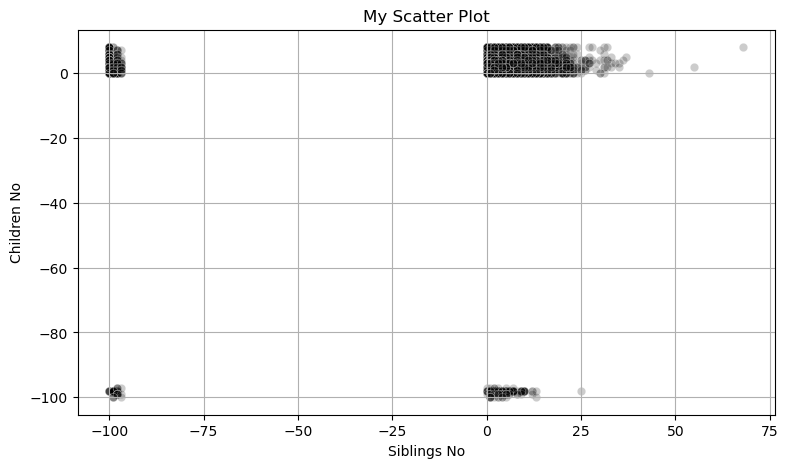

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/Users/dilagurer/Desktop/GSS_data.xlsx'

df = pd.read_excel(path)

corr = df[['sibs', 'childs']].corr()
plt.figure(figsize=(9, 5))
sns.heatmap(corr, annot=True, cmap='pink', fmt=".5f", linewidths=0.9)
plt.title('My Corr Matrix')
plt.show()

plt.figure(figsize=(9, 5))
sns.scatterplot(x='sibs', y='childs', data=df, color='black', alpha=0.2)
plt.title('My Scatter Plot')
plt.xlabel('Siblings No')
plt.ylabel('Children No')
plt.grid(True)
plt.show()
